In [55]:
import pandas as pd
import seaborn as sns
import os

RESULTS_DIR = "results"
EXPERIMENT = "results-cloud-3"

In [56]:
locations = pd.read_csv("eu_cities.csv")

In [57]:
df = pd.DataFrame()

files = os.listdir(os.path.join(".", RESULTS_DIR, EXPERIMENT))

for f in files:
    if f.endswith("-history.csv"):
        client = f[2:-len(".ext4-history.csv")]
        df_run = pd.read_csv(os.path.join(".", RESULTS_DIR, EXPERIMENT, f))
        df_run.dropna(inplace=True)
        df_run["Client"] = client
        df = df.append(df_run)

In [58]:
df.head()

,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size,Client
1,1.637247e+09,1.0,GET,/,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,957.0,957.0,957.0,957.0,1816.0,Malaga
3,1.637247e+09,1.0,GET,/,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,64.0,359.0,56.0,957.0,2075.0,Malaga
4,1.637247e+09,1.0,POST,/,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,150.0,155.5,148.0,163.0,2473.5,Malaga
5,1.637247e+09,1.0,GET,/auth/find-friends/,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,64.0,64.5,64.0,65.0,1974.0,Malaga
6,1.637247e+09,1.0,GET,/auth/login/,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,110.0,110.0,110.0,110.0,2961.0,Malaga


In [59]:
len(df["Client"].unique())

120

In [60]:
df["Timestamp"] = df["Timestamp"] - min(df["Timestamp"])
start_time = max(df["Timestamp"]) - 1000
df = df[ (df["Timestamp"] >  start_time) & (df["Timestamp"] < start_time+900) ]
df["Timestamp"] = df["Timestamp"] - min(df["Timestamp"])
df.head()

,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size,Client
1683,0.0,1.0,GET,/,0.2,0.0,19000.0,19000.0,19000.0,19000.0,...,19000.0,19000.0,90.0,0.0,290.0,714.211111,56.0,18676.0,8724.755556,Malaga
1684,0.0,1.0,POST,/,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16.0,0.0,490.0,889.812500,148.0,6621.0,7810.062500,Malaga
1685,0.0,1.0,GET,/auth/find-friends/,0.0,0.0,250.0,250.0,260.0,260.0,...,260.0,260.0,106.0,0.0,240.0,366.386792,57.0,8019.0,1974.000000,Malaga
1686,0.0,1.0,GET,/auth/login/,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,110.0,110.000000,110.0,110.0,2961.000000,Malaga
1687,0.0,1.0,POST,/auth/login/,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16.0,0.0,490.0,1156.125000,125.0,5284.0,8776.562500,Malaga


In [61]:
filtered = df[ (df["Name"] == "/") ]
filtered

,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size,Client
1683,0.0,1.0,GET,/,0.2,0.0,19000.0,19000.0,19000.0,19000.0,...,19000.0,19000.0,90.0,0.0,290.0,714.211111,56.0,18676.0,8724.755556,Malaga
1684,0.0,1.0,POST,/,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16.0,0.0,490.0,889.812500,148.0,6621.0,7810.062500,Malaga
1692,1.0,1.0,GET,/,0.2,0.0,470.0,470.0,19000.0,19000.0,...,19000.0,19000.0,92.0,0.0,290.0,703.913043,56.0,18676.0,8765.717391,Malaga
1693,1.0,1.0,POST,/,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16.0,0.0,490.0,889.812500,148.0,6621.0,7810.062500,Malaga
1701,2.0,1.0,GET,/,0.2,0.0,280.0,470.0,470.0,19000.0,...,19000.0,19000.0,93.0,0.0,290.0,699.376344,56.0,18676.0,8784.000000,Malaga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9619,896.0,1.0,POST,/,0.0,0.0,440.0,440.0,440.0,440.0,...,440.0,440.0,80.0,0.0,410.0,824.937500,140.0,11188.0,10272.425000,Cologne
9627,897.0,1.0,GET,/,0.9,0.0,270.0,310.0,320.0,320.0,...,4600.0,4600.0,569.0,0.0,210.0,449.632689,49.0,24705.0,10119.760984,Cologne
9628,897.0,1.0,POST,/,0.1,0.0,440.0,440.0,440.0,440.0,...,440.0,440.0,80.0,0.0,410.0,824.937500,140.0,11188.0,10272.425000,Cologne
9636,898.0,1.0,GET,/,0.9,0.0,270.0,310.0,320.0,440.0,...,4600.0,4600.0,569.0,0.0,210.0,449.632689,49.0,24705.0,10119.760984,Cologne


In [62]:
selection = filtered[ filtered["Client"].isin(["Berlin", "Malaga"]) ]
selection

,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size,Client
1683,0.0,1.0,GET,/,0.2,0.0,19000.0,19000.0,19000.0,19000.0,...,19000.0,19000.0,90.0,0.0,290.0,714.211111,56.0,18676.0,8724.755556,Malaga
1684,0.0,1.0,POST,/,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16.0,0.0,490.0,889.812500,148.0,6621.0,7810.062500,Malaga
1692,1.0,1.0,GET,/,0.2,0.0,470.0,470.0,19000.0,19000.0,...,19000.0,19000.0,92.0,0.0,290.0,703.913043,56.0,18676.0,8765.717391,Malaga
1693,1.0,1.0,POST,/,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16.0,0.0,490.0,889.812500,148.0,6621.0,7810.062500,Malaga
1701,2.0,1.0,GET,/,0.2,0.0,280.0,470.0,470.0,19000.0,...,19000.0,19000.0,93.0,0.0,290.0,699.376344,56.0,18676.0,8784.000000,Malaga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9705,896.0,1.0,POST,/,0.1,0.0,620.0,620.0,620.0,620.0,...,620.0,620.0,70.0,0.0,540.0,630.700000,205.0,6043.0,10173.571429,Berlin
9713,897.0,1.0,GET,/,0.3,0.0,370.0,370.0,4700.0,4700.0,...,4700.0,4700.0,504.0,0.0,260.0,489.361111,35.0,17784.0,10190.902778,Berlin
9714,897.0,1.0,POST,/,0.1,0.0,620.0,620.0,620.0,620.0,...,620.0,620.0,70.0,0.0,540.0,630.700000,205.0,6043.0,10173.571429,Berlin
9722,898.0,1.0,GET,/,0.3,0.0,270.0,370.0,370.0,4700.0,...,4700.0,4700.0,506.0,0.0,260.0,488.225296,35.0,17784.0,10192.069170,Berlin


<AxesSubplot:xlabel='Timestamp', ylabel='Total Median Response Time'>

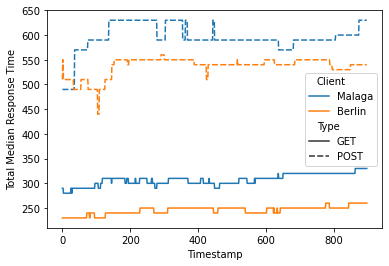

In [63]:
sns.lineplot(x="Timestamp", y="Total Median Response Time", data=selection, hue="Client", style="Type")

<AxesSubplot:xlabel='Timestamp', ylabel='Total Median Response Time'>

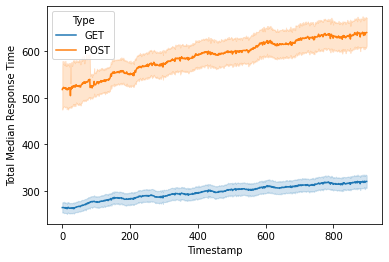

In [64]:
sns.lineplot(x="Timestamp", y="Total Median Response Time", data=filtered, hue="Type")

KeyboardInterrupt: 

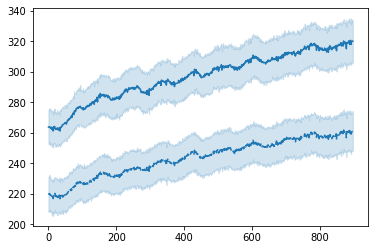

In [65]:
sns.lineplot(x="Timestamp", y="Total Median Response Time", data=df[ (df["Name"] != "Aggregated") ], hue="Type", style="Name")

In [66]:
locations["latency"] = locations["city_ascii"].apply(lambda x: df[ (df["Client"] ==  x) & (df["Name"] == "/public/") & (df["Type"] == "GET") ]["Total Median Response Time"].mean() )
locations.head()



,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,latency
0,Paris,Paris,48.8566,2.3522,France,FR,FRA,Île-de-France,primary,11020000.0,1250015082,279.340045
1,London,London,51.5072,-0.1275,UnitedKingdom,GB,GBR,"London,Cityof",primary,10979000.0,1826645935,313.217877
2,Madrid,Madrid,40.4167,-3.7167,Spain,ES,ESP,Madrid,primary,6026000.0,1724616994,461.351955
3,Barcelona,Barcelona,41.3825,2.1769,Spain,ES,ESP,Catalonia,admin,4588000.0,1724594040,432.153326
4,Berlin,Berlin,52.5167,13.3833,Germany,DE,DEU,Berlin,primary,3644826.0,1276451290,236.748603


In [67]:
locations[ locations["city_ascii"].isin(["Frankfurt"]) ]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,latency
51,Frankfurt,Frankfurt,50.1136,8.6797,Germany,DE,DEU,Hesse,minor,753056.0,1276054552,250.927602


<AxesSubplot:xlabel='lng', ylabel='lat'>

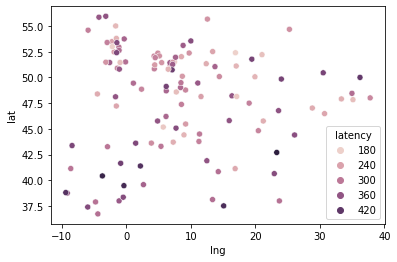

In [68]:
sns.scatterplot(x="lng", y="lat", hue="latency", data=locations)